## Import Necessary Libraries

In [18]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


## Read data from files and choosing features and labels

In [19]:
dataset = pd.read_csv('created_dataset/EPL_data_augmented_last_5_matches.csv', index_col=None, header=0)
start = 0
finish = len(dataset)
df_features = dataset.iloc[start:finish, 12:28]
df_features = df_features.interpolate(method='linear')
result = dataset['FTR'][start:finish]



<Axes: >

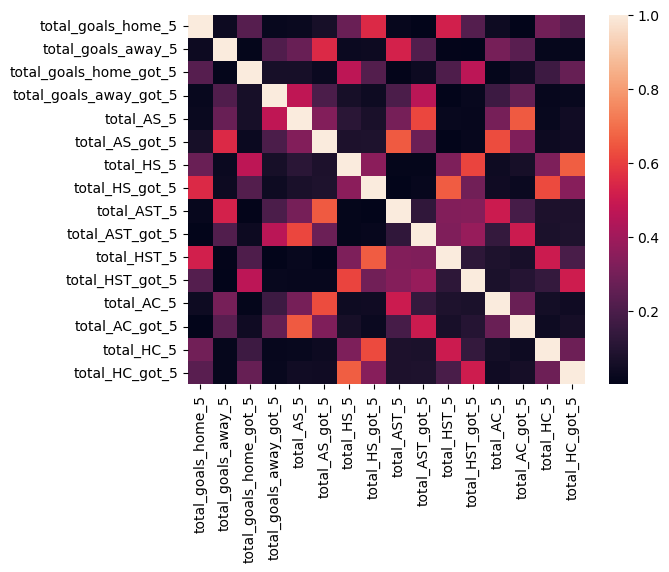

In [20]:
# Print out the correlation matrix
sns.heatmap(df_features.corr().abs())

<Axes: >

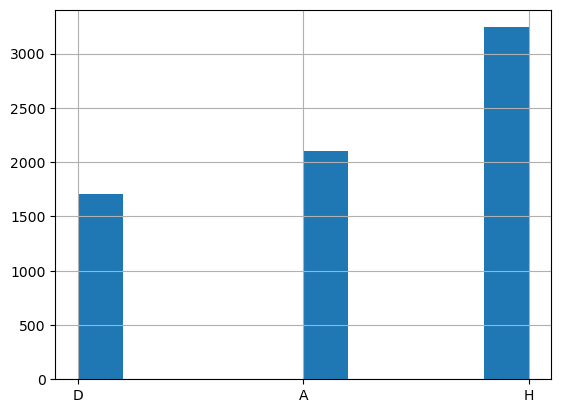

In [21]:
result.hist()

In [22]:
# Create correlation matrix
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df_features.drop(to_drop, axis=1, inplace=True)

In [23]:
df_features.head()

,total_goals_home_5,total_goals_away_5,total_goals_home_got_5,total_goals_away_got_5,total_AS_5,total_AS_got_5,total_HS_5,total_HS_got_5,total_AST_5,total_AST_got_5,total_HST_5,total_HST_got_5,total_AC_5,total_AC_got_5,total_HC_5,total_HC_got_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
## Transform to numpy array
result = pd.factorize(result)
features = np.array(df_features)

scaler = Normalizer()

features = scaler.fit_transform(features)
result = np.array(result[0])
train_size = int(len(features) * 0.8)
X_train, X_val = features[:train_size], features[train_size:]
y_train, y_val = result[:train_size], result[train_size:]
X_val, X_test = X_val[:len(X_val) // 2], X_val[len(X_val) // 2:]
y_val, y_test = y_val[:len(y_val) // 2], y_val[len(y_val) // 2:]

## Function to return expected returns with specific bookmakers or maximum bet rate

In [25]:
def return_rate(y_pred, y_val, first_index, train_size):
    dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=None, header=0)
    test = []
    for i in range(0, len(y_val)):
        if(y_val[i] == y_pred[i]):
            if (y_val[i] == 0):
                test.append(dataset.loc[first_index + train_size + i]['MaxD'])
            if (y_val[i] == 1):
                test.append(dataset.loc[first_index + train_size + i]['MaxA'])    
            if (y_val[i] == 2):
                test.append(dataset.loc[first_index + train_size + i]['MaxH'])
        else:
            test.append(0)
    print(test)
    print(sum(test) / len(test))

## Train the model

### Main model

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model = MLPClassifier((20, 20))
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(y_pred)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)

[2 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1 2 2 1 1 2 2 1 2 1 2
 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 2 1
 2 2 1 2 2 1 2 1 1 1 1 2 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2
 1 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 2 2
 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 2 1 1 2 2 1 2 2 1 2 1 2 2 2
 2 2 2 1 1 1 2 2 2 1 2 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2
 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 2 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 2 2 2 2 1 1 2 1 2
 2 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 2 2 2 1 1 1 2 1
 2 2 2 2 2 2 2 1 2 1 1 2 2 2 1 1 2 1 2 2 1 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1 1 1 2 1 2 2 2 2 2 1 2 1 1 1
 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 1 2 1 1 2 1
 2 2 2 2 2 2 1 2 2 2 1 1 

C:\Users\trung\AppData\Local\Temp\ipykernel_8304\2241631389.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=None, header=0)


### Auxillary model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)

0.48936170212765956
[4.3, 2.14, 0, 1.72, 1.19, 0, 1.46, 0, 0, 1.38, 0, 2.22, 1.46, 1.8, 0, 1.16, 0, 0, 1.62, 0, 0, 1.38, 2.07, 0, 0, 0, 1.35, 2.16, 2.35, 2.75, 0, 0, 1.14, 0, 1.18, 1.85, 0, 0, 2.1, 1.38, 0, 2.5, 0, 3.01, 0, 0, 0, 1.54, 1.37, 3.4, 0, 2.13, 2.05, 0, 1.9, 0, 0, 0, 1.1, 1.45, 2.25, 0, 0, 0, 1.35, 0, 2.04, 0, 1.71, 2.52, 1.59, 1.7, 0, 0, 0, 0, 2.26, 1.69, 2.81, 1.59, 0, 0, 0, 2.4, 2.75, 4.75, 0, 3.87, 2.62, 1.54, 1.47, 1.81, 0, 0, 0, 1.82, 1.6, 1.56, 0, 0, 0, 0, 1.53, 0, 0, 0, 0, 4.23, 0, 0, 0, 0, 0, 0, 1.29, 2.88, 0, 0, 0, 1.68, 2.1, 1.35, 0, 1.43, 2.85, 0, 0, 1.67, 2.56, 0, 0, 2.1, 0, 0, 1.44, 1.88, 1.56, 0, 0, 5.27, 1.54, 0, 4.35, 1.38, 0, 2.53, 0, 1.99, 2.9, 0, 0, 0, 1.19, 3.77, 2.72, 2.07, 0, 3.81, 0, 0, 0, 1.15, 2.12, 1.58, 0, 2.08, 2.1, 1.57, 0, 3.35, 0, 2.63, 0, 0, 1.76, 0, 0, 0, 2.11, 0, 0, 0, 1.83, 0, 0, 1.85, 0, 0, 1.5, 1.57, 1.53, 2.53, 0, 0, 0, 1.77, 2.06, 3.75, 1.55, 0, 2.01, 0, 0, 1.15, 1.95, 1.82, 0, 0, 0, 0, 0, 0, 2.48, 0, 0, 1.6, 0, 0, 0, 0, 2.09, 0, 0, 1.

C:\Users\trung\AppData\Local\Temp\ipykernel_8304\2241631389.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=None, header=0)


In [28]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)

0.4808510638297872
[4.3, 2.14, 0, 1.72, 1.19, 0, 1.46, 0, 0, 1.38, 0, 2.22, 1.46, 1.8, 0, 1.16, 0, 0, 1.62, 0, 0, 1.38, 0, 1.88, 0, 0, 1.35, 2.16, 2.35, 2.75, 0, 0, 1.14, 0, 1.18, 0, 0, 0, 2.1, 1.38, 0, 2.5, 0, 0, 0, 0, 0, 1.54, 1.37, 3.4, 0, 2.13, 2.05, 0, 1.9, 0, 0, 0, 1.1, 1.45, 2.25, 0, 0, 0, 1.35, 0, 2.04, 0, 1.71, 2.52, 1.59, 1.7, 0, 1.57, 0, 0, 2.26, 1.69, 2.81, 1.59, 0, 0, 0, 2.4, 0, 0, 0, 3.87, 2.62, 1.54, 1.47, 1.81, 0, 2.55, 0, 1.82, 1.6, 1.56, 0, 0, 0, 0, 1.53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.29, 2.88, 0, 0, 0, 1.68, 2.1, 1.35, 0, 1.43, 0, 4.0, 0, 1.67, 2.56, 0, 0, 2.1, 0, 0, 1.44, 1.88, 1.56, 2.5, 0, 0, 1.54, 0, 4.35, 1.38, 0, 0, 0, 1.99, 2.9, 0, 0, 0, 1.19, 3.77, 2.72, 2.07, 0, 3.81, 0, 2.38, 0, 1.15, 2.12, 1.58, 0, 0, 2.1, 1.57, 0, 0, 0, 2.63, 0, 0, 1.76, 0, 0, 0, 2.11, 0, 0, 0, 1.83, 0, 0, 1.85, 0, 0, 1.5, 1.57, 1.53, 2.53, 0, 0, 0, 1.77, 2.06, 3.75, 1.55, 0, 2.01, 0, 0, 1.15, 0, 1.82, 0, 0, 0, 0, 0, 0, 2.48, 0, 0, 1.6, 0, 0, 0, 1.85, 2.09, 0, 0, 1.72, 2.36, 0, 2.58,

C:\Users\trung\AppData\Local\Temp\ipykernel_8304\2241631389.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=None, header=0)


In [29]:
inference = []
# Features are: total_goals_home_4	total_goals_away_4	total_goals_home_got_4	total_goals_away_got_4	total_AS_4	total_AS_got_4	total_HS_4	total_HS_got_4	total_AST_4	total_AST_got_4	total_HST_4	total_HST_got_4	total_AC_4	total_AC_got_4	total_HC_4	total_HC_got_4
# These are the statistics of the last 4 games played by home and away teams.
# 'got' means the amount of goals/etc that the home/away teams have been scored by the opponents in the last 4 games that each team played.
# Output is [0, 1, 2], in which 0 is draw, 1 is away, 2 is home.

In [30]:
# # Save the model to file
# import joblib
# filename = 'trained_model/prediction_with_FCNN_last_4_matches.pkl'
# joblib.dump(model, filename)